In [84]:
# я не знаю какие есть архитектуры для RL
# я знаю для CV
# ну в данном случае мы работаем как с табличными данными
# так что модели с линейными слоями нам подходят
# если мало двух слоев будет то добавим еще
# единственное я бы попробовал нормализовать данные
# хотя если сейчас значения в состояниях масштабированы
# то можно и без нормализации можно обойтись

# нормализация нужна когда у нас, например, одна переменная в состояниях принимает значения от 0 до 1,
# а другая переменная принимает значения от 100 до 1000
# естественно они будут вносить разный вклад в функцию ошибки
# следовательно нужно эти обе переменные привести к одному масштабу
# но я думаю нам до этого пока рано
# надо поиграться с тем что имеем сейчас


# SDDSDDSA: так как не особо хорошо интерпретирует результаты
# SDDSDDSA: но он дал хороший результаты среди аутсайдеров
# SDDSDDSA: локальный результат хорош
# SDDSDDSA: но в глобальном смысле t_n должен быть большой

In [1085]:
import os
import glob
import gym
import gym_maze
import numpy as np
import random
import time
import tqdm
import json
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
exps = list(glob.glob('./experiments/*.json'))

def get_exp_type(fname):
    return fname.split('/')[-1].split('_')[0]

data = []
cnt = Counter()
for experiment in exps:
    d = json.load(open(experiment,'r'))
    if len(d['episode_data'])==0: continue
    name = get_exp_type(experiment)
    d['type'] = name.capitalize()
    d['label'] = f"{d['id']} Ep:{d['episode_n']} Traj n:{d['trajectory_n']} Ln:{d['layers_n']} Q:{d['q_param']}"
    cnt.update(d['version'])
    data.append(d)
# data=list(sorted(data, key=lambda x: x['trajectory_n']+x['lamd']))

g_trajectories = set([d['trajectory_n'] for d in data])
g_trajectories_len = set([d['trajectory_len'] for d in data])
g_layers = set([str(d['layers_n']) for d in data])
g_q_params =  set([d['q_param'] for d in data])
print(len(data))
print(g_trajectories)
print(g_trajectories_len)
print(g_layers)
print(g_q_params)

190
{100, 70, 200, 10, 300, 50, 150}
{1000, 500}
{'[100, 30]', '[200, 65, 10]', '[30, 400]', '[400, 10]', '[10, 200]', '[200, 200]', '[10, 10, 65]', '[30]', '[65, 200]', '[10, 10]', '[100, 200]', '[10, 100, 100]', '[100, 400]', '[10, 100, 30]', '[65, 100]', '[65, 30]', '[30, 100]', '[400, 200]', '[200, 400]', '[10, 10, 100]', '[100, 10]', '[65, 400]', '[200, 200, 400]', '[10, 10, 30]', '[400, 30]', '[200, 65]', '[100, 100]', '[10, 65, 30]', '[100, 65, 65]', '[100, 400, 30]', '[10, 400]', '[10, 10, 10]', '[400, 30, 200]', '[30, 30, 10]', '[30, 200]', '[100]', '[150]', '[10, 65, 65]', '[65]', '[30, 65]', '[30, 10, 10]', '[10, 10, 200]', '[65, 10]', '[30, 10, 30]', '[30, 100, 10]', '[200, 10]', '[200]', '[10, 100, 65]', '[10, 30]', '[100, 65]', '[10, 100]', '[200, 30]', '[10]', '[400, 100]', '[10, 30, 200]', '[10, 100, 10]', '[30, 10, 65]', '[65, 65, 200]', '[10, 65]', '[400, 65]', '[30, 400, 400]', '[65, 400, 100]', '[65, 65]', '[400, 400]'}
{0.7, 0.8, 0.5, 0.9}


In [1079]:
def get_item(a, i):
    if i > len(a)-1:
        return None
#     print(len(a), i)
    return a[i]

In [1080]:
def last_std(arr,lastN):
    rewards = np.array(arr)[::,0]
    return np.std(rewards[-lastN:])

def last_mean(arr,lastN):
    rewards = np.array(arr)[::,0]
    return np.mean(rewards[-lastN:])


In [1081]:
# do nothing, fire left orientation engine, fire main engine, fire right orientation engine.a

In [1082]:
pd_data = []
for d in data:
    ed = np.array(d['episode_data'])
    pd_data.append([d['id'], d['version'], d['episode_n'], d['trajectory_n'], d['trajectory_len'], d['q_param'], 
                    d['total_elapsed'],  d['finished'], 
                    len(d['episode_data']), np.mean(ed[::,0][-25:]), np.mean(ed[::,0][-50:]), np.std(ed[::,0][-50:]), 
                    len(d['layers_n']), 
                    get_item(d['layers_n'],0), get_item(d['layers_n'],1), get_item(d['layers_n'],2)
#                    ,d['episode_data']
                   ])

df = pd.DataFrame(columns=['id', 'version', 'episode_n', 'trajectory_n', 'trajectory_len', 'q_param', 
                           'total_elapsed', 'finished',
                           'len_ed', 'mean25_ed', 'mean50_ed', 'std_ed', 'layers_cnt', 'layers_n1', 'layers_n2', 'layers_n3'
#                            , 'data'
                          ],
                 data = pd_data)


In [1066]:
df.to_csv('data.csv', sep='\t')

In [1067]:
df[df['id']=='2292098547091']

id version  episode_n  trajectory_n  trajectory_len  q_param  \
132  2292098547091       2        400           200             500      0.5   

     total_elapsed  finished  len_ed   mean25_ed   mean50_ed    std_ed  \
132   22017.954769      True     400  269.602251  268.580158  9.979655   

     layers_cnt  layers_n1  layers_n2  layers_n3  
132           1        200        NaN        NaN

In [1068]:
df

id version  episode_n  trajectory_n  trajectory_len  q_param  \
0    2287189634114       1        200           150             500      0.7   
1    2287198420634       1        200           150             500      0.8   
2    2287208017163       1        200           150             500      0.9   
3    2287223764251       1        200           150            1000      0.7   
4    2287236024882       1        200           150            1000      0.8   
..             ...     ...        ...           ...             ...      ...   
177  2302782731016       4        400           100             500      0.5   
178  2303752440811       4        400           100             500      0.5   
179  2304749850198       4        400           100             500      0.5   
180  2305845064115       4        400           100             500      0.5   
181  2306968164056       4        400           100             500      0.5   

     total_elapsed  finished  len_ed   mean25_ed   mean50_ed     std_ed  \
0     14804.552606      True     200  222.531080  188.701615  44.634190   
1     15014.121405      True     200  143.144873  142.460678  21.489821   
2      9011.934088      True     200  216.145610  215.707191  20.699036   
3     26793.039190      True     200  144.686111  147.141633  11.668393   
4     29568.566618      True     200   95.526387   89.584672  20.789522   
..             ...       ...     ...         ...         ...        ...   
177   17657.227028      True     400   -5.420144  -34.934625  58.518712   
178    2109.999554      True     400 -132.415758 -132.411418   4.405579   
179   20275.913393      True     400  129.985034   91.293279  56.465428   
180    4748.296723      True     400 -851.722200 -858.690023  52.026336   
181   10459.823764      True     400 -583.129699 -577.894589  18.044103   

     layers_cnt  layers_n1  layers_n2  layers_n3  
0             1        100        NaN        NaN  
1             1        100        NaN        NaN  
2             1        100        NaN        NaN  
3             1        100        NaN        NaN  
4             1        100        NaN        NaN  
..          ...        ...        ...        ...  
177           3        100       65.0       65.0  
178           3        100      400.0       30.0  
179           3        200       65.0       10.0  
180           3        200      200.0      400.0  
181           3        400       30.0      200.0  

[182 rows x 16 columns]

In [1069]:
df.sort_values('mean25_ed', ascending=False).head(10)

id version  episode_n  trajectory_n  trajectory_len  q_param  \
132  2292098547091       2        400           200             500      0.5   
130  2292024736000       2        400           200             500      0.5   
122  2289569819764       1        200           300            1000      0.5   
69   2289384530357       1        200           150             500      0.5   
13   2287789736369       1        200           150             500      0.8   
80   2290092674916       1        200           300             500      0.5   
119  2289524828615       1        200           300             500      0.7   
128  2291950921733       2        400           200             500      0.5   
44   2290748504803       1        200           300             500      0.7   
6    2287465267159       1        200           150             500      0.7   

     total_elapsed  finished  len_ed   mean25_ed   mean50_ed     std_ed  \
132   22017.954769      True     400  269.602251  268.580158   9.979655   
130   28958.114572      True     400  265.589053  262.010732   9.526486   
122   19451.925294      True     200  263.598279  256.169142  14.964869   
69     8044.215785      True     200  261.945072  256.295844  15.899406   
13     6739.560764      True     200  259.567827  236.850029  37.452773   
80    13431.681405      True     200  258.064933  261.404808  12.125584   
119   15543.779846      True     200  257.211539  252.912292  11.076982   
128   30139.205586      True     400  255.304107  256.753822  23.089123   
44    11197.604180      True     200  253.278272  255.932590  15.792391   
6      9801.152788      True     200  248.934321  243.696097  26.858776   

     layers_cnt  layers_n1  layers_n2  layers_n3  
132           1        200        NaN        NaN  
130           1        150        NaN        NaN  
122           1        100        NaN        NaN  
69            1        100        NaN        NaN  
13            1        200        NaN        NaN  
80            1        150        NaN        NaN  
119           1        100        NaN        NaN  
128           1        100        NaN        NaN  
44            1        200        NaN        NaN  
6             1        150        NaN        NaN

In [1070]:
df.sort_values('mean25_ed', ascending=False).head(10)

id version  episode_n  trajectory_n  trajectory_len  q_param  \
132  2292098547091       2        400           200             500      0.5   
130  2292024736000       2        400           200             500      0.5   
122  2289569819764       1        200           300            1000      0.5   
69   2289384530357       1        200           150             500      0.5   
13   2287789736369       1        200           150             500      0.8   
80   2290092674916       1        200           300             500      0.5   
119  2289524828615       1        200           300             500      0.7   
128  2291950921733       2        400           200             500      0.5   
44   2290748504803       1        200           300             500      0.7   
6    2287465267159       1        200           150             500      0.7   

     total_elapsed  finished  len_ed   mean25_ed   mean50_ed     std_ed  \
132   22017.954769      True     400  269.602251  268.580158   9.979655   
130   28958.114572      True     400  265.589053  262.010732   9.526486   
122   19451.925294      True     200  263.598279  256.169142  14.964869   
69     8044.215785      True     200  261.945072  256.295844  15.899406   
13     6739.560764      True     200  259.567827  236.850029  37.452773   
80    13431.681405      True     200  258.064933  261.404808  12.125584   
119   15543.779846      True     200  257.211539  252.912292  11.076982   
128   30139.205586      True     400  255.304107  256.753822  23.089123   
44    11197.604180      True     200  253.278272  255.932590  15.792391   
6      9801.152788      True     200  248.934321  243.696097  26.858776   

     layers_cnt  layers_n1  layers_n2  layers_n3  
132           1        200        NaN        NaN  
130           1        150        NaN        NaN  
122           1        100        NaN        NaN  
69            1        100        NaN        NaN  
13            1        200        NaN        NaN  
80            1        150        NaN        NaN  
119           1        100        NaN        NaN  
128           1        100        NaN        NaN  
44            1        200        NaN        NaN  
6             1        150        NaN        NaN

In [1071]:
df[df['layers_cnt']==2].sort_values('mean25_ed', ascending=False)

id version  episode_n  trajectory_n  trajectory_len  q_param  \
147  2295712140124       3        400           100             500      0.5   
151  2295853834254       3        400           100             500      0.5   
159  2296081964952       3        400           100             500      0.5   
142  2295544359654       3        400           100             500      0.5   
133  2295195100690       3        400           100             500      0.5   
152  2295878666643       3        400           100             500      0.5   
135  2295269733941       3        400           100             500      0.5   
141  2295516527882       3        400           100             500      0.5   
134  2295221248791       3        400           100             500      0.5   
146  2295684743375       3        400           100             500      0.5   
49   2295773113254       3        400           100             500      0.5   
136  2295295787581       3        400           100             500      0.5   
144  2295626802817       3        400           100             500      0.5   
47   2295432360007       3        400           100             500      0.5   
157  2296019840994       3        400           100             500      0.5   
48   2295598087242       3        400           100             500      0.5   
140  2295488869908       3        400           100             500      0.5   
148  2295742016022       3        400           100             500      0.5   
46   2295244280154       3        400           100             500      0.5   
153  2295905171078       3        400           100             500      0.5   
138  2295405400446       3        400           100             500      0.5   
155  2295961894236       3        400           100             500      0.5   
158  2296050387854       3        400           100             500      0.5   
139  2295459840273       3        400           100             500      0.5   
149  2295801787563       3        400           100             500      0.5   
161  2296140644394       3        400           100             500      0.5   
154  2295935492810       3        400           100             500      0.5   
137  2295321839410       3        400           100             500      0.5   
143  2295570656342       3        400           100             500      0.5   
145  2295655743892       3        400           100             500      0.5   
162  2296170514484       3        400           100             500      0.5   
156  2295990223883       3        400           100             500      0.5   
150  2295828983783       3        400           100             500      0.5   
160  2296110021230       3        400           100             500      0.5   

     total_elapsed  finished  len_ed   mean25_ed   mean50_ed      std_ed  \
147   20236.331723      True     400  247.586255  203.219920   52.448482   
151   26365.052454      True     400  234.110513  246.441388   28.092807   
159   17018.773725     False     171  205.744610  224.424288   49.230919   
142   32941.099582      True     400  177.116817  185.322744   52.391263   
133   27729.542618      True     400  155.879225  154.945834    5.374700   
152   37644.457715     False     302  155.140584  169.601361   43.405867   
135   27402.283667      True     400  149.552005  148.835641   13.903595   
141   26810.244438      True     400  145.650058  147.635443   29.251097   
134   30737.931730      True     400  143.245910  148.896475   10.401661   
146   45331.658856     False     380  130.444312  127.586984   16.419632   
49    41680.533165      True     400  125.062107  101.421203   30.789048   
136   29418.692760      True     400  123.962277  129.682337   25.066622   
144   33169.657522      True     400  123.460686  125.726299   32.934478   
47    28808.875692      True     400  121.896624  108.934077   24.908160   
157   22740.847829     False     169  121.539311  117.151409   17.980156   

влияние размера одного слоя сети сети на  
Q:0.5  tn:100 L:[...]

In [1072]:
cnt = Counter()
for d in data:
#     cnt.update([f"Q:{d['q_param']}"])
#     cnt.update([f"Q:{d['q_param']} tl:{d['trajectory_len']}"])
#     cnt.update([f"Q:{d['q_param']} tl:{d['trajectory_len']} tn:{d['trajectory_n']}"])
    cnt.update([f"Q:{d['q_param']} tn:{d['trajectory_n']} L:{str(d['layers_n'])}"])
cnt
sorted(cnt.items())


[('Q:0.5 tn:10 L:[100]', 2),
 ('Q:0.5 tn:10 L:[150]', 2),
 ('Q:0.5 tn:10 L:[200]', 2),
 ('Q:0.5 tn:100 L:[10, 10, 100]', 1),
 ('Q:0.5 tn:100 L:[10, 10, 10]', 1),
 ('Q:0.5 tn:100 L:[10, 10, 200]', 1),
 ('Q:0.5 tn:100 L:[10, 10, 30]', 1),
 ('Q:0.5 tn:100 L:[10, 10, 65]', 1),
 ('Q:0.5 tn:100 L:[10, 100, 100]', 1),
 ('Q:0.5 tn:100 L:[10, 100, 10]', 1),
 ('Q:0.5 tn:100 L:[10, 100, 30]', 1),
 ('Q:0.5 tn:100 L:[10, 100, 65]', 1),
 ('Q:0.5 tn:100 L:[10, 100]', 1),
 ('Q:0.5 tn:100 L:[10, 10]', 1),
 ('Q:0.5 tn:100 L:[10, 200]', 1),
 ('Q:0.5 tn:100 L:[10, 30, 200]', 1),
 ('Q:0.5 tn:100 L:[10, 30]', 1),
 ('Q:0.5 tn:100 L:[10, 400]', 1),
 ('Q:0.5 tn:100 L:[10, 65, 30]', 1),
 ('Q:0.5 tn:100 L:[10, 65, 65]', 1),
 ('Q:0.5 tn:100 L:[10, 65]', 1),
 ('Q:0.5 tn:100 L:[100, 100]', 1),
 ('Q:0.5 tn:100 L:[100, 10]', 1),
 ('Q:0.5 tn:100 L:[100, 200]', 1),
 ('Q:0.5 tn:100 L:[100, 30]', 1),
 ('Q:0.5 tn:100 L:[100, 400, 30]', 1),
 ('Q:0.5 tn:100 L:[100, 400]', 1),
 ('Q:0.5 tn:100 L:[100, 65, 65]', 1),
 ('Q:0.5 t

In [1014]:
listyles = {"Laplase":'dashed','Policy':'solid','Cem': 'dotted'}

for group in sorted(groups):
# for group in groups:
    graph_trajectory(data, group)

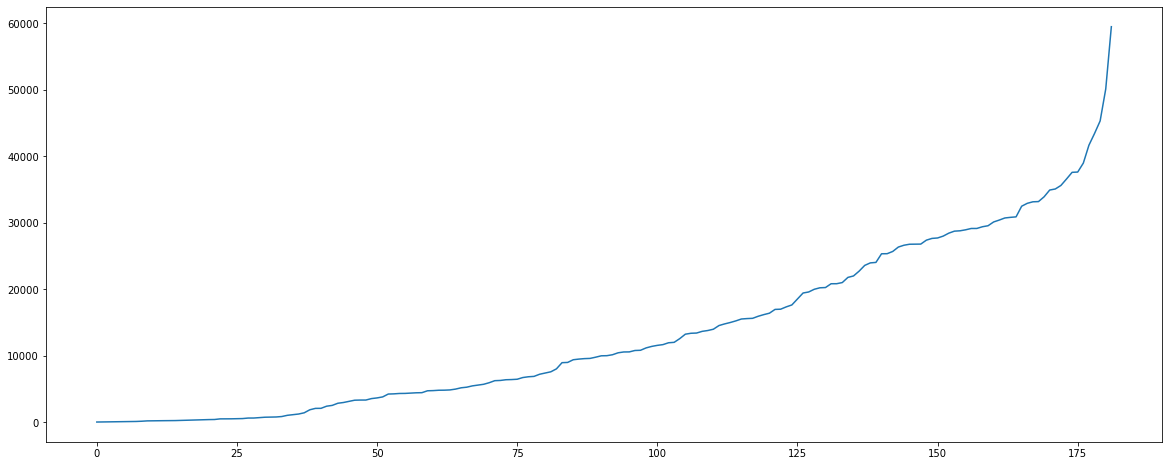

In [1015]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(20,8))
total_elapseds = [ ed['total_elapsed'] for i, ed in enumerate(graph_data)]
plt.plot(range(len(total_elapseds)), total_elapseds)

In [1016]:
valid = df['len_ed']==df['episode_n']

In [1017]:
np.sum(valid)

152

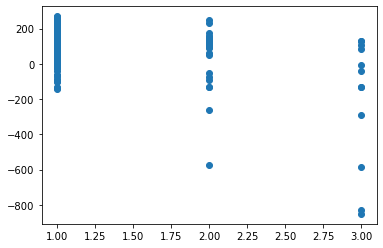

In [1018]:
plt.scatter(df[valid]['layers_cnt'], df[valid]['mean25_ed'])

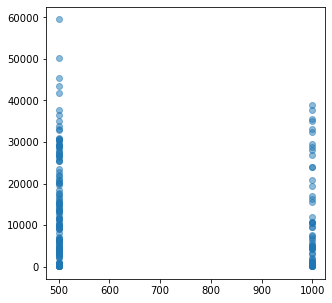

In [1019]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['trajectory_len'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

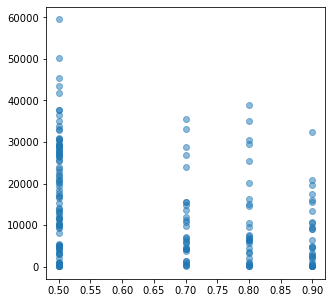

In [1020]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['q_param'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

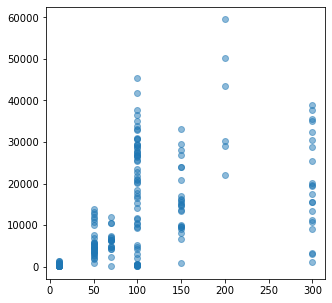

In [1021]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['trajectory_n'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

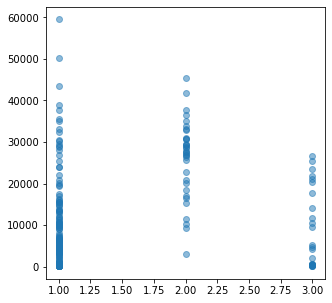

In [1022]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [len(ed['layers_n']) for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

Q Parameter

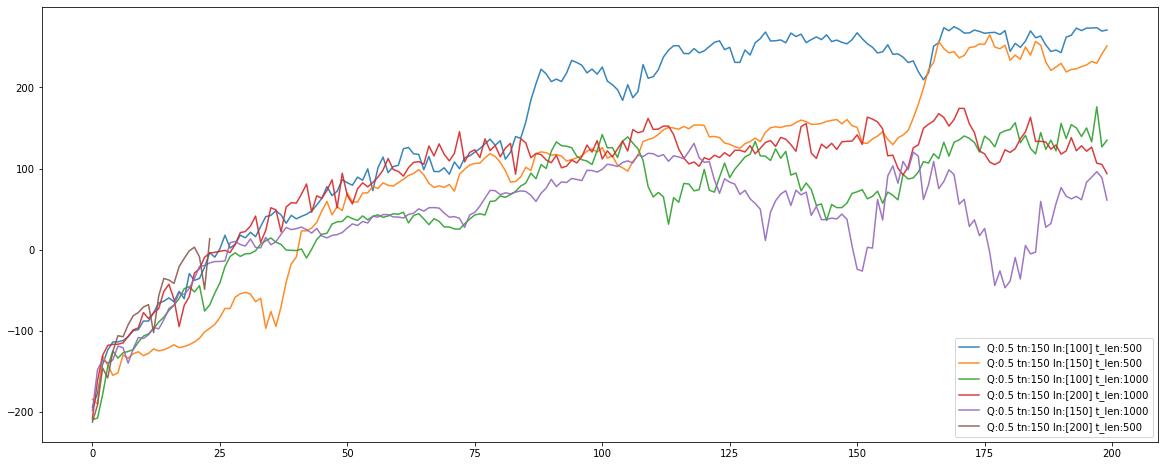

In [1023]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-x['episode_data'][-1][0]):
    if ed['q_param']!=0.5:continue
    if ed['trajectory_n']!=150:continue
#     if len(ed['layers_n'])!=1:continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')


2296081964952 Q:0.5 tn:100 ln:[400, 65] t_len:500
2295853834254 Q:0.5 tn:100 ln:[200, 10] t_len:500
2295516527882 Q:0.5 tn:100 ln:[65, 10] t_len:500
2295878666643 Q:0.5 tn:100 ln:[200, 30] t_len:500
2295712140124 Q:0.5 tn:100 ln:[100, 30] t_len:500
2295221248791 Q:0.5 tn:100 ln:[10, 30] t_len:500
2295195100690 Q:0.5 tn:100 ln:[10, 10] t_len:500
2296019840994 Q:0.5 tn:100 ln:[400, 10] t_len:500
2295269733941 Q:0.5 tn:100 ln:[10, 100] t_len:500
2295742016022 Q:0.5 tn:100 ln:[100, 65] t_len:500
2295295787581 Q:0.5 tn:100 ln:[10, 200] t_len:500
2295626802817 Q:0.5 tn:100 ln:[65, 200] t_len:500
2295773113254 Q:0.5 tn:100 ln:[100, 100] t_len:500
2295459840273 Q:0.5 tn:100 ln:[30, 200] t_len:500
2295961894236 Q:0.5 tn:100 ln:[200, 200] t_len:500
2295684743375 Q:0.5 tn:100 ln:[100, 10] t_len:500
2295905171078 Q:0.5 tn:100 ln:[200, 65] t_len:500
2295244280154 Q:0.5 tn:100 ln:[10, 65] t_len:500
2295405400446 Q:0.5 tn:100 ln:[30, 65] t_len:500
2295432360007 Q:0.5 tn:100 ln:[30, 100] t_len:500
229

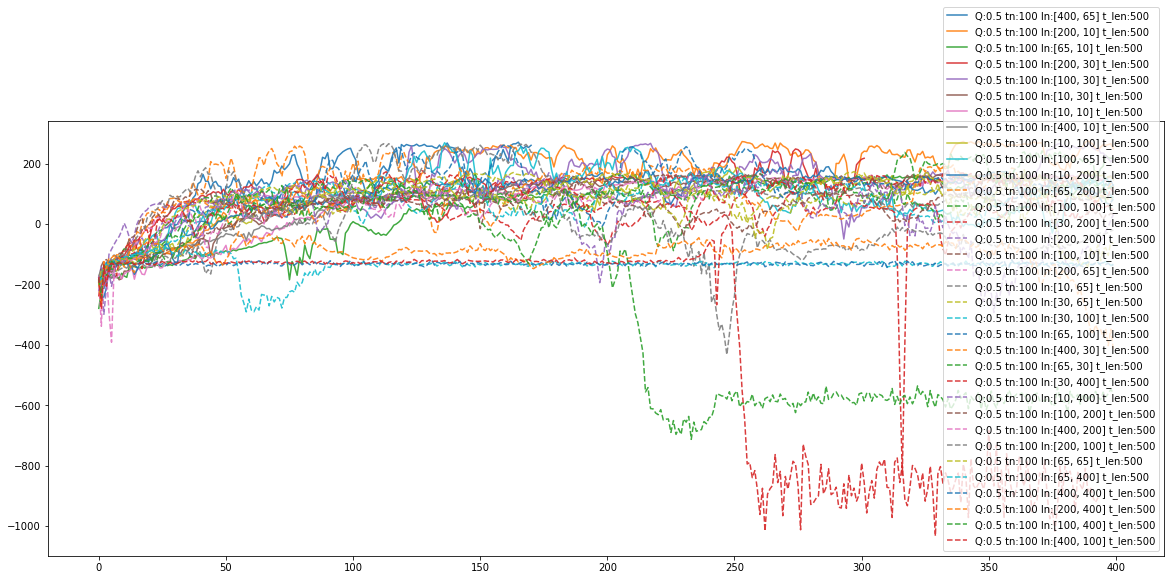

In [1024]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]

# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-x['episode_data'][-1][0]):
    if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if len(ed['layers_n'])!=2:continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)

    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 10 else 'solid',
             label=lable)
leg = plt.legend(loc='lower right')


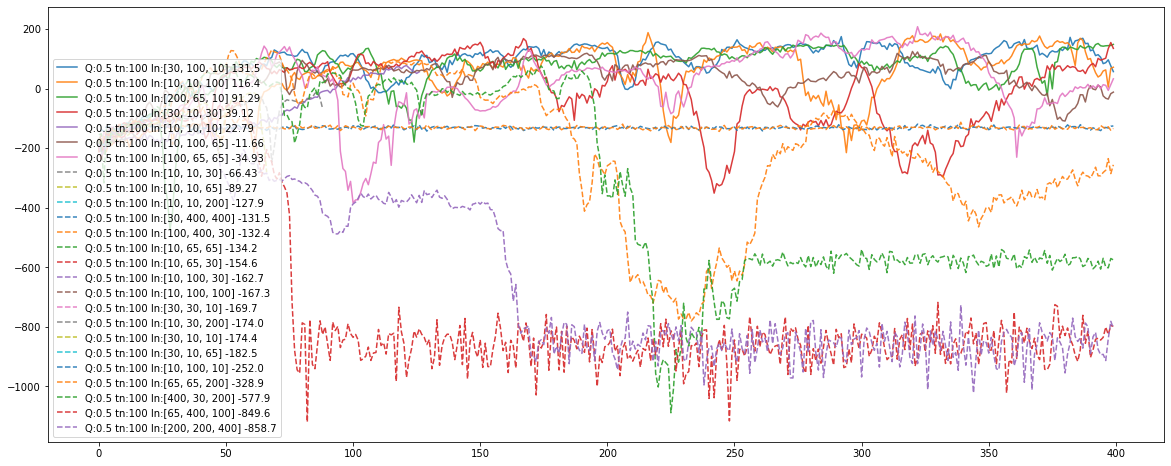

In [1025]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]

# for group in sorted(groups):
graph_data = []

for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'],50)):
    if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if len(ed['layers_n'])!=3:continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} {last_mean(ed['episode_data'], 50):0.4}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower left')


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2290748504803 Q:218.4, 0.7 tn:300 ln:[200] t_len:500
2287819483353 Q:180.4, 0.8 tn:150 ln:[200] t_len:1000
2287789736369 Q:164.2, 0.8 tn:150 ln:[200] t_len:500
2287465267159 Q:153.7, 0.7 tn:150 ln:[150] t_len:500
2290186107434 Q:139.0, 0.7 tn:300 ln:[150] t_len:1000
6412267369 Q:126.9, 0.7 tn:70 ln:[150] t_len:1000
2287189634114 Q:122.3, 0.7 tn:150 ln:[100] t_len:500
2290410650317 Q:114.4, 0.5 tn:50 ln:[200] t_len:500
2290206223614 Q:110.6, 0.8 tn:300 ln:[150] t_len:1000
2287523963825 Q:108.9, 0.9 tn:150 ln:[150] t_len:1000


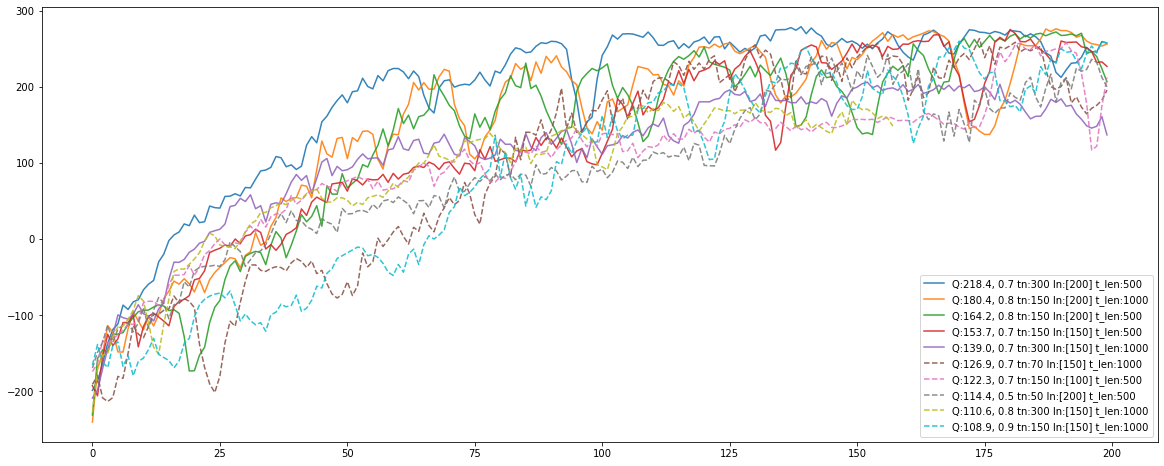

In [1026]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'],-20)):
#     if ed['q_param']!=0.5:continue
    graph_data.append(ed)

graph_data = graph_data[:10]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{last_mean(ed['episode_data'],-20):0.4}, {ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 4 else 'solid',
             label=lable)
leg = plt.legend(loc='lower right')


2290748504803 255.8 Q:0.7 tn:300 ln:[200] t_len:500
2289524828615 253.5 Q:0.7 tn:300 ln:[100] t_len:500
2287465267159 236.9 Q:0.7 tn:150 ln:[150] t_len:500
6417427043 233.5 Q:0.7 tn:70 ln:[200] t_len:500
2290109075800 231.4 Q:0.7 tn:300 ln:[150] t_len:500
6412267369 222.4 Q:0.7 tn:70 ln:[150] t_len:1000
6418223916 210.5 Q:0.7 tn:70 ln:[200] t_len:1000
2287189634114 210.0 Q:0.7 tn:150 ln:[100] t_len:500
6416468866 201.6 Q:0.7 tn:50 ln:[200] t_len:1000
6402171926 191.1 Q:0.7 tn:50 ln:[100] t_len:500
2289586500297 176.6 Q:0.7 tn:300 ln:[100] t_len:1000
2290186107434 175.5 Q:0.7 tn:300 ln:[150] t_len:1000
2287501931245 164.0 Q:0.7 tn:150 ln:[150] t_len:1000
2287779104328 163.1 Q:0.7 tn:150 ln:[200] t_len:500
2287810209359 150.9 Q:0.7 tn:150 ln:[200] t_len:1000
2287223764251 145.8 Q:0.7 tn:150 ln:[100] t_len:1000
6409558227 127.7 Q:0.7 tn:50 ln:[150] t_len:1000
6410622380 127.5 Q:0.7 tn:70 ln:[150] t_len:500
6405068848 106.3 Q:0.7 tn:70 ln:[100] t_len:1000
6404142523 103.3 Q:0.7 tn:70 ln:[1

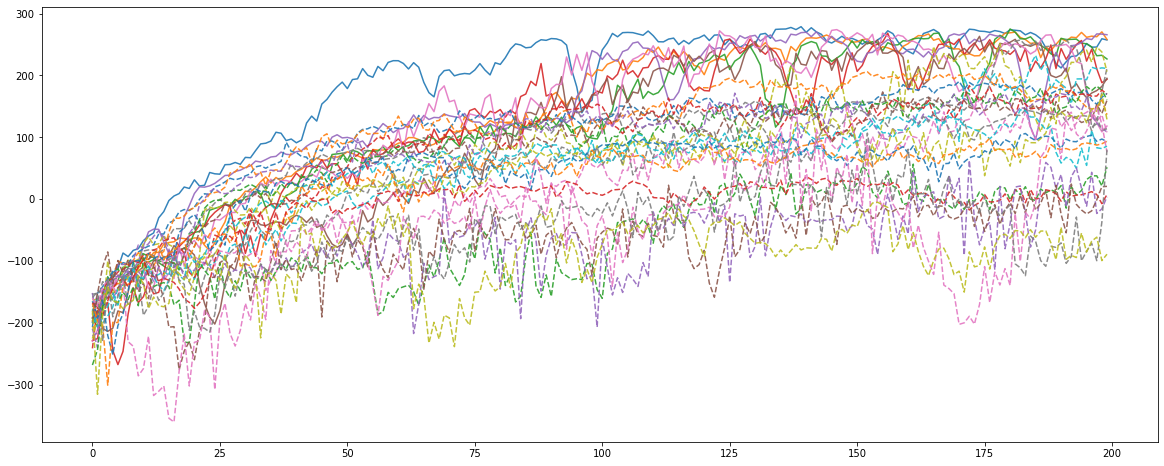

In [1027]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'], 30)):
    if ed['q_param']!=0.7:continue
    graph_data.append(ed)


plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{last_mean(ed['episode_data'], 30):0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')


2287789736369 259.2 Q:0.8 tn:150 ln:[200] t_len:500
2287819483353 225.9 Q:0.8 tn:150 ln:[200] t_len:1000
6405310643 221.8 Q:0.8 tn:70 ln:[100] t_len:1000
6408837731 191.4 Q:0.8 tn:50 ln:[150] t_len:500
6416805880 181.7 Q:0.8 tn:50 ln:[200] t_len:1000
2289603491094 177.7 Q:0.8 tn:300 ln:[100] t_len:1000
2290206223614 160.8 Q:0.8 tn:300 ln:[150] t_len:1000
2287512694840 154.7 Q:0.8 tn:150 ln:[150] t_len:1000
2290128155630 154.4 Q:0.8 tn:300 ln:[150] t_len:500
2290766197475 150.0 Q:0.8 tn:300 ln:[200] t_len:500
2289538816485 147.5 Q:0.8 tn:300 ln:[100] t_len:500
2287198420634 139.7 Q:0.8 tn:150 ln:[100] t_len:500
2287475451152 138.6 Q:0.8 tn:150 ln:[150] t_len:500
6404474504 127.6 Q:0.8 tn:70 ln:[100] t_len:500
6411267961 121.4 Q:0.8 tn:70 ln:[150] t_len:500
6412649826 101.4 Q:0.8 tn:70 ln:[150] t_len:1000
2287236024882 96.27 Q:0.8 tn:150 ln:[100] t_len:1000
6417710910 94.7 Q:0.8 tn:70 ln:[200] t_len:500
6402388579 84.61 Q:0.8 tn:50 ln:[100] t_len:500
6403492914 57.57 Q:0.8 tn:50 ln:[100]

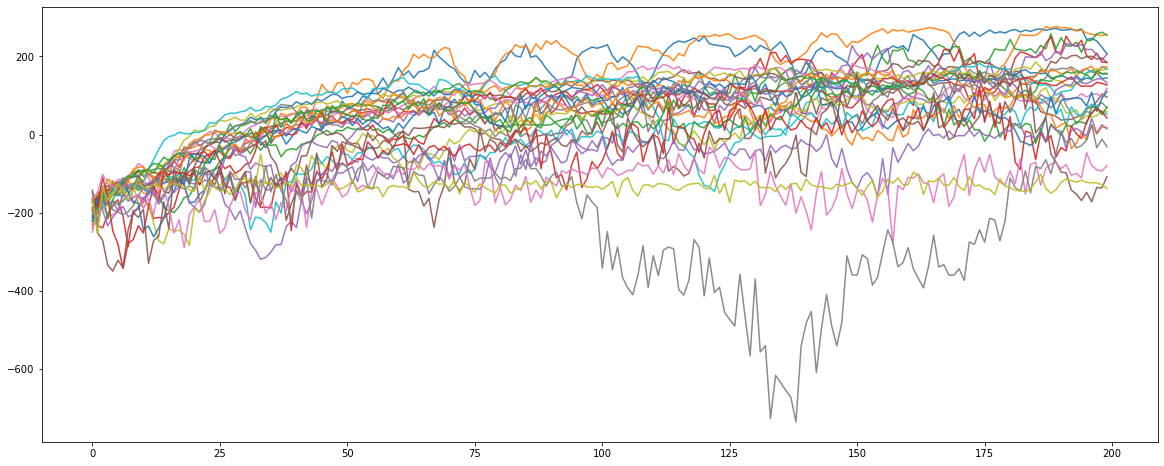

In [1028]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'], 30)):
    if ed['q_param']!=0.8:continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{last_mean(ed['episode_data'], 30):0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)    
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')


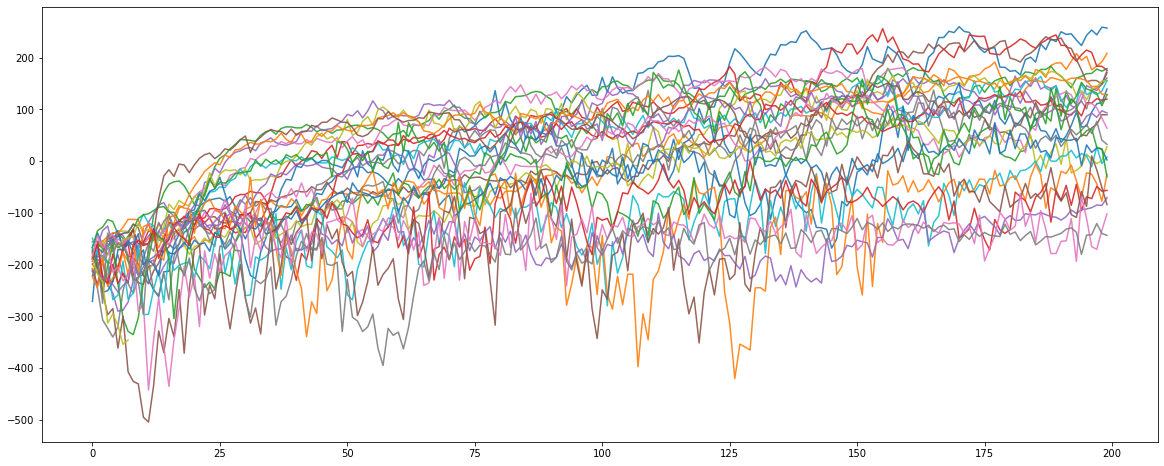

In [1029]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-x['episode_data'][-1][0]):
    if ed['q_param']!=0.9:continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')


2289569819764
2289384530357
2290109075800
2289524828615
2290748504803
2287523963825
2287819483353


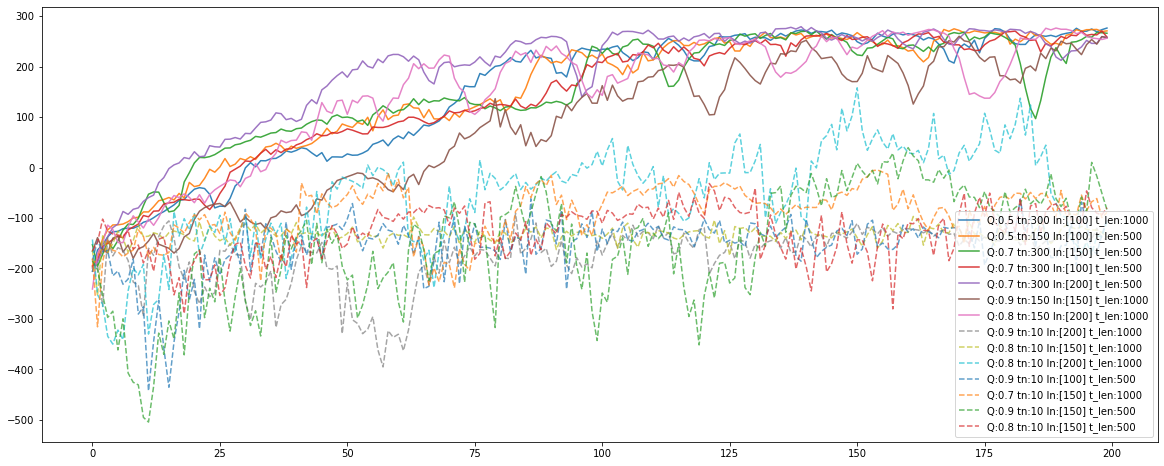

In [1030]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-x['episode_data'][-1][0]):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0])):
#     print(len(ed['episode_data']))
    if len(ed['episode_data'])!=200:continue
#     if (#ed['trajectory_n']!= 640
#         ed['q_param'] != 0.9
#        ): continue
    graph_data.append(ed)

graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')

# plt.show()

# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:x['episode_data'][-1][0]):
    if len(ed['episode_data'])!=200:continue

#     if (#ed['trajectory_n']!= 640
#         ed['q_param'] != 0.9
#        ): continue
    graph_data.append(ed)

graph_data = graph_data[:7]
    
# plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.7,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed',
             label=lable)
    leg = plt.legend(loc='lower right')

plt.show()

In [1038]:
best_of_the_best_mean25 = set(df.sort_values('mean25_ed', ascending=False).head(10)['id'])
best_of_the_best_mean50 = set(df.sort_values('mean50_ed', ascending=False).head(10)['id'])

In [1039]:
best_of_the_best_mean50,best_of_the_best_mean25

({'2287465267159',
  '2289384530357',
  '2289524828615',
  '2289569819764',
  '2290092674916',
  '2290748504803',
  '2291950921733',
  '2292024736000',
  '2292098547091',
  '2295853834254'},
 {'2287465267159',
  '2287789736369',
  '2289384530357',
  '2289524828615',
  '2289569819764',
  '2290092674916',
  '2290748504803',
  '2291950921733',
  '2292024736000',
  '2292098547091'})

2287465267159
2287789736369
2290748504803
2289384530357
2290092674916
2289524828615
2289569819764


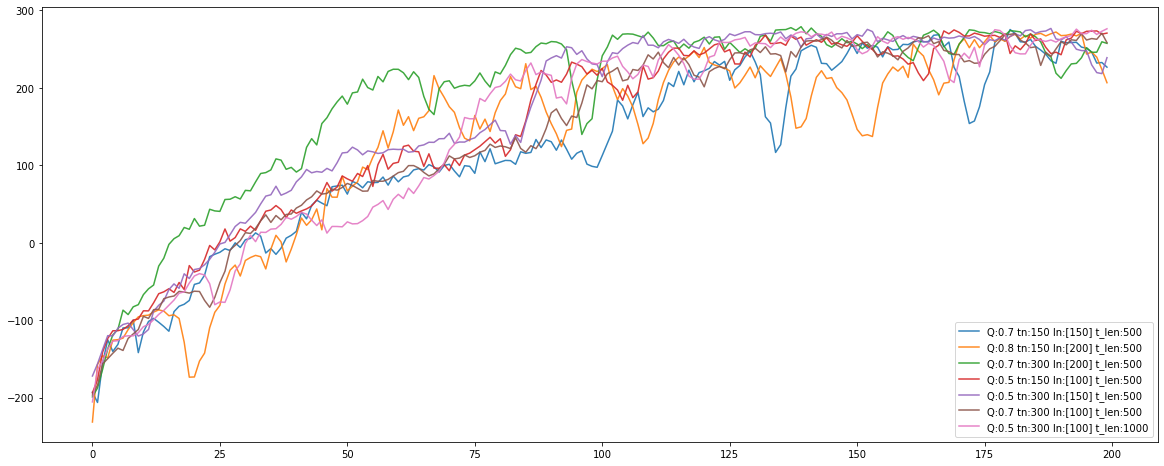

In [1042]:
# for group in sorted(groups):
graph_data = []
for ed in data:
    if not (ed['id'] in best_of_the_best_mean25): continue
    graph_data.append(ed)

graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')


2287465267159
2290748504803
2289384530357
2290092674916
2289524828615
2289569819764
2291950921733


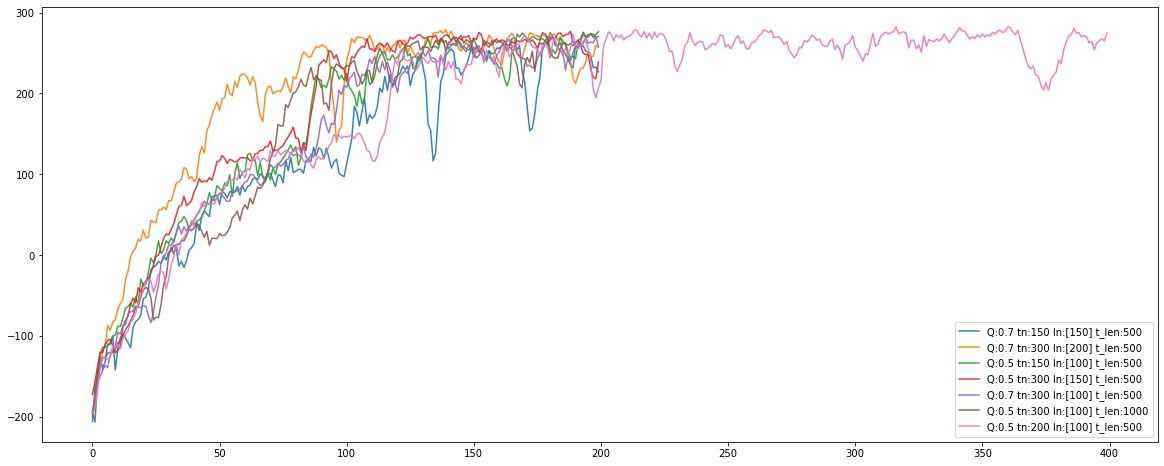

In [1043]:
# for group in sorted(groups):
graph_data = []
for ed in data:
    if not (ed['id'] in best_of_the_best_mean50): continue
    graph_data.append(ed)

graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')


In [9]:
# Влияние trajectory_n на процесс обучение

6414439922
6400680881
6413509004
6407463479
6398894595
6405807355


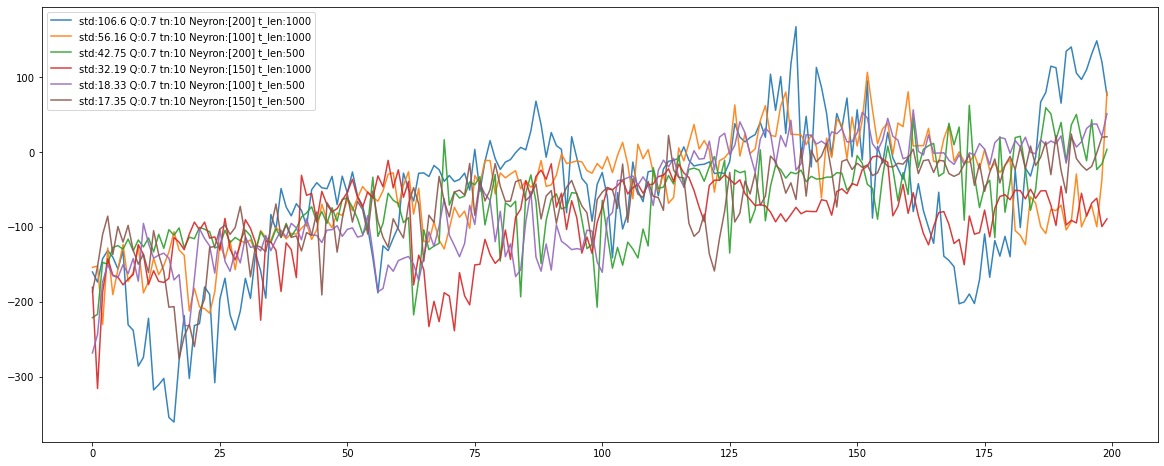

6418223916
6405068848
6412267369
6404142523
6417427043
6410622380


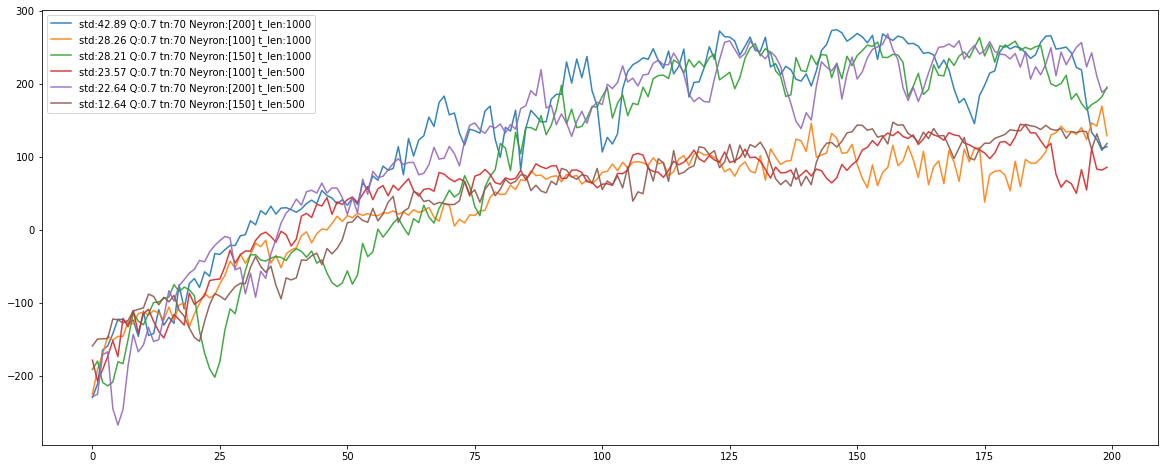

2290109075800
2290787295379
2289621002049
2290766197475
2289554170067
2290186107434
2289603491094
2290145630591
2290748504803
2289569819764
2289538816485
2290128155630
2290092674916
2289524828615
2289586500297


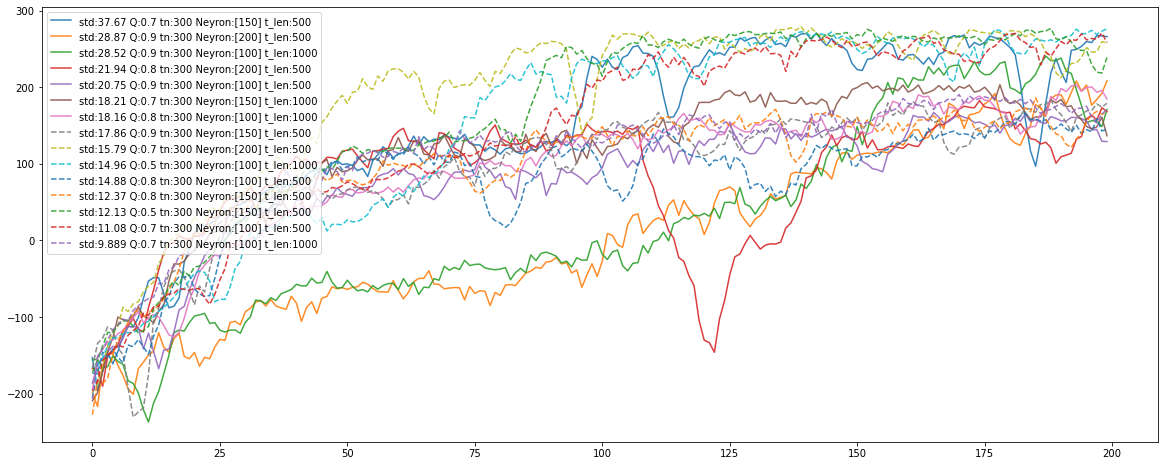

In [1044]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if len(ed['episode_data'])!=200:continue
    if (#ed['trajectory_len']!= 1000
        ed['trajectory_n']!=10
        or  ed['q_param'] != 0.7
        ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')
plt.show()

# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if len(ed['episode_data'])!=200:continue

    if (#ed['trajectory_len']!= 1000
        ed['trajectory_n']!=70
        or  ed['q_param'] != 0.7
        ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')
plt.show()

# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if len(ed['episode_data'])!=200:continue
    if ed['trajectory_n']!=300: continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')
plt.show()

In [91]:
# чтобы сохранить низкую дисперсию в последних шагах, 
# нужно учеличивать пропорционально колво нейронов и кол-во тракеторий
layers_n = [[10], [30], [65], [100], [150], [200]]
episodes_n = [200]
trajectories_n = [50, 150, 300, ]
trajectories_len = [500]
q_params = [0.5]
versions=['2']

6416468866
6418223916
6405068848
6412267369
6409558227
2287810209359
2290186107434
2287501931245
2287223764251
6403149655
2289586500297


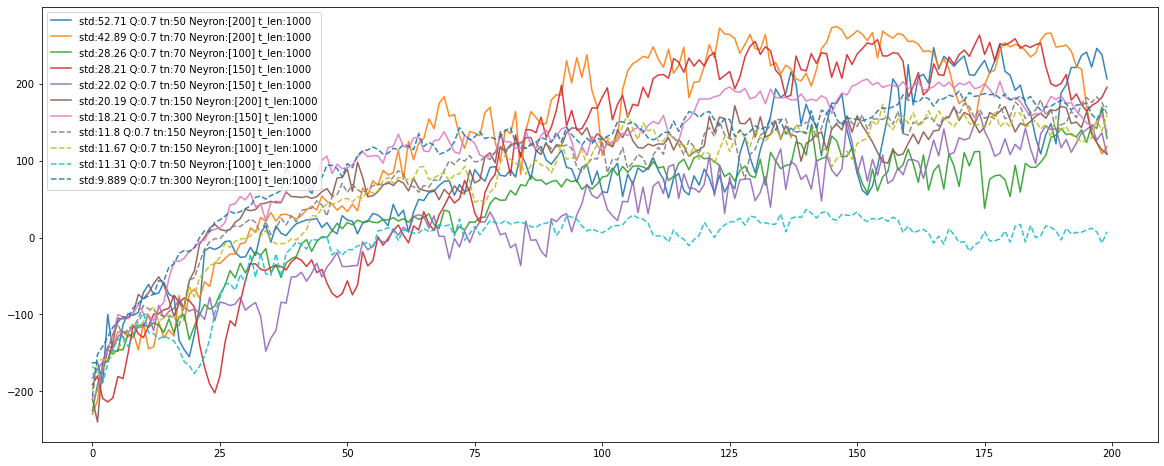

In [1045]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if len(ed['episode_data'])!=200:continue

    if (ed['trajectory_len']!= 1000
        or ed['trajectory_n']<11
        or  ed['q_param'] != 0.7
        ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')

plt.show()

2290016002902
2289443530024
2290491284386
2289321180313
2289857879154
2290647408028
2289569819764


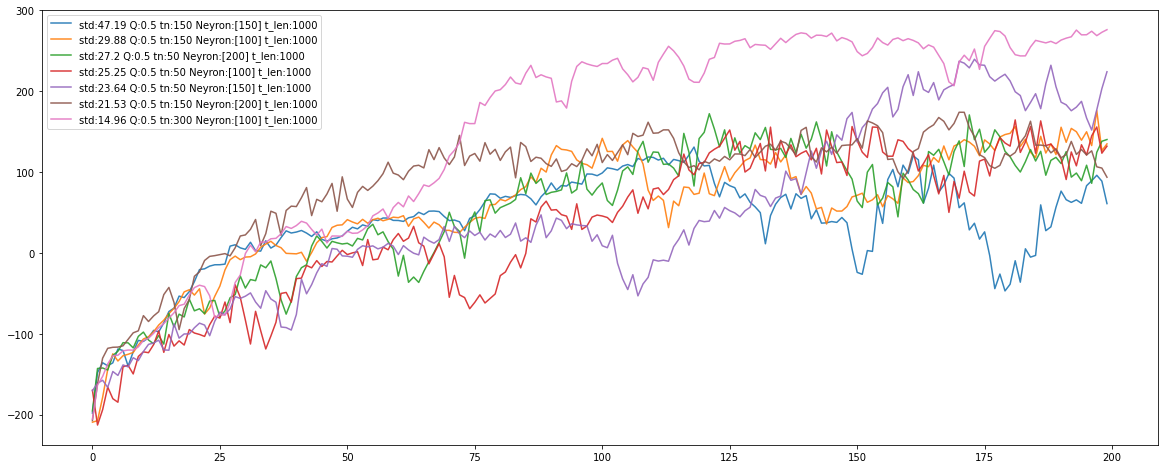

In [1046]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if len(ed['episode_data'])!=200:continue

    if (ed['trajectory_len']!= 1000
        or ed['trajectory_n']<11
        or  ed['q_param'] != 0.5
        ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')

plt.show()

6416468866
6402171926
6409558227
6415384184
6403149655
6408496043


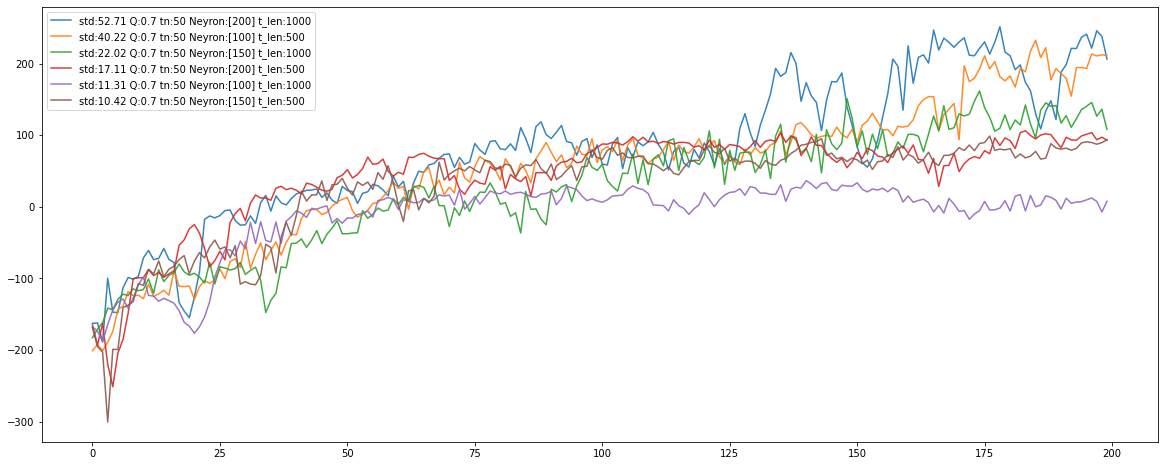

In [1047]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if (#ed['trajectory_len']!= 1000
         ed['trajectory_n']!=50
        or  ed['q_param'] != 0.7
        ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} tn:{ed['trajectory_n']} Neyron:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='upper left')

plt.show()

In [42]:
# я не знаю какие есть архитектуры для RL
# я знаю для CV
# ну в данном случае мы работаем как с табличными данными
# так что модели с линейными слоями нам подходят
# если мало двух слоев будет то добавим еще
# единственное я бы попробовал нормализовать данные
# хотя если сейчас значения в состояниях масштабированы
# то можно и без нормализации можно обойтись

# нормализация нужна когда у нас, например, одна переменная в состояниях принимает значения от 0 до 1,
# а другая переменная принимает значения от 100 до 1000
# естественно они будут вносить разный вклад в функцию ошибки
# следовательно нужно эти обе переменные привести к одному масштабу
# но я думаю нам до этого пока рано
# надо поиграться с тем что имеем сейчас

Графики сетей с большим количеством слоев

2295570656342 std:108.0 Q:0.5 Neyron:[65, 65], 100
2295990223883 std:104.1 Q:0.5 Neyron:[200, 400], 100
2295321839410 std:71.33 Q:0.5 Neyron:[10, 400], 100
2296110021230 std:63.84 Q:0.5 Neyron:[400, 100], 100
2295742016022 std:53.84 Q:0.5 Neyron:[100, 65], 100
2295712140124 std:52.45 Q:0.5 Neyron:[100, 30], 100
2295544359654 std:52.39 Q:0.5 Neyron:[65, 30], 100
2296081964952 std:49.23 Q:0.5 Neyron:[400, 65], 100
2295459840273 std:44.73 Q:0.5 Neyron:[30, 200], 100
2295878666643 std:43.41 Q:0.5 Neyron:[200, 30], 100
2296140644394 std:39.08 Q:0.5 Neyron:[400, 200], 100
2295488869908 std:38.93 Q:0.5 Neyron:[30, 400], 100
2295405400446 std:33.12 Q:0.5 Neyron:[30, 65], 100
2295626802817 std:32.93 Q:0.5 Neyron:[65, 200], 100
2295773113254 std:30.79 Q:0.5 Neyron:[100, 100], 100
2296050387854 std:30.56 Q:0.5 Neyron:[400, 30], 100
2295516527882 std:29.25 Q:0.5 Neyron:[65, 10], 100
2295853834254 std:28.09 Q:0.5 Neyron:[200, 10], 100
2295295787581 std:25.07 Q:0.5 Neyron:[10, 200], 100
229543236000

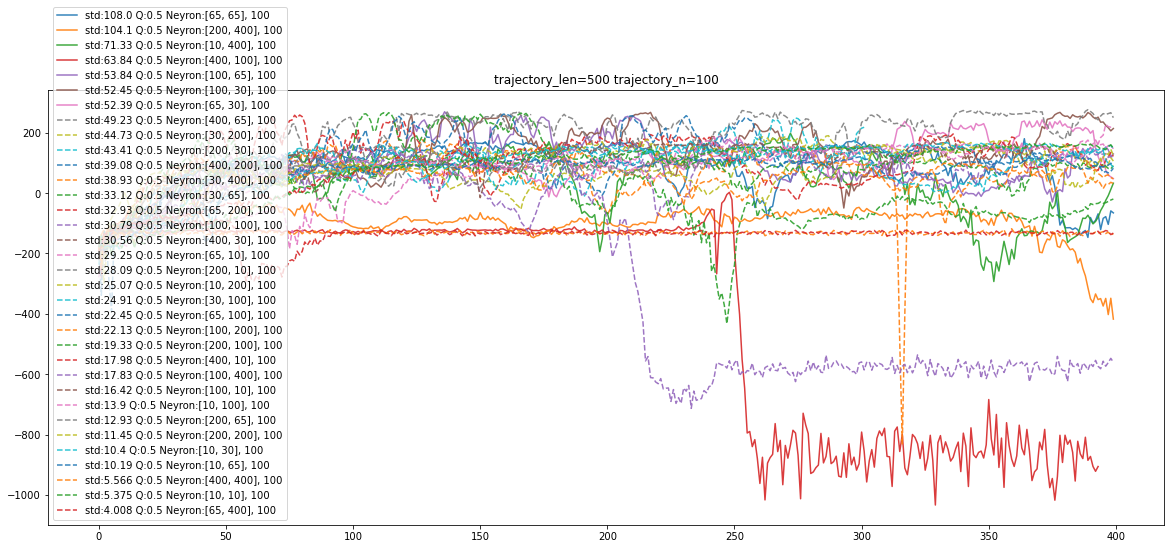

In [1048]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if (len(ed['layers_n'])!=2): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} Neyron:{ed['layers_n']}, {ed['trajectory_n']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=100')
plt.show()

2302782731016
2298818867762
2301869471853
2304749850198
2305845064115
2298168636587
2301029315447
2297580987042
2299521567332
2306968164056
2303752440811
2300232181546


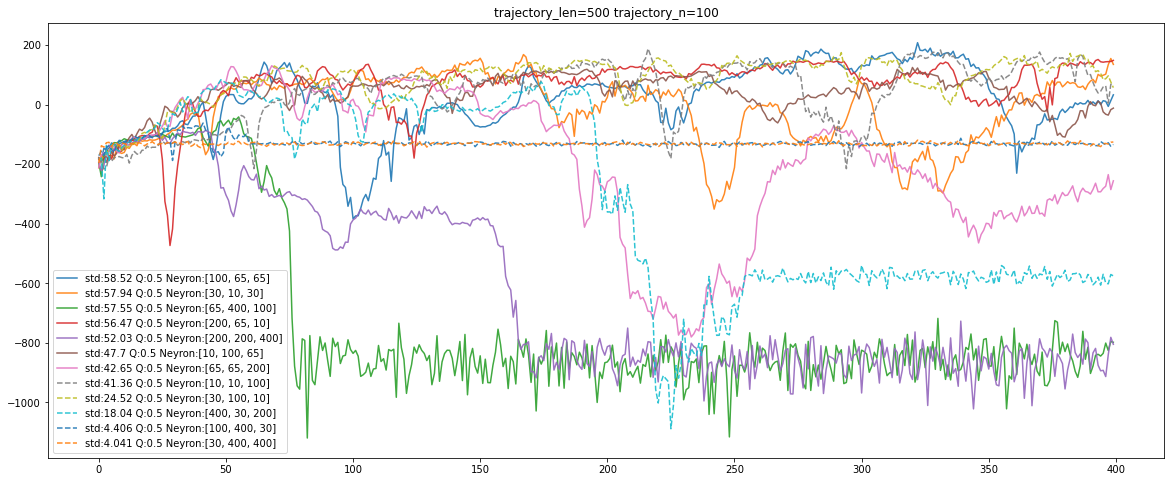

In [15]:
# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if (len(ed['layers_n'])!=3): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)

# graph_data = graph_data[:7]
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = np.std(np.array(ed['episode_data'])[::,0][-50:])
    lable = f"std:{std:0.4} Q:{ed['q_param']} Neyron:{ed['layers_n']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=100')
plt.show()

Learning rate candidates

2287189634114
2287198420634
2287208017163
2287465267159
2287475451152
2287488265106
2289935299829
2289384530357
2291950921733
2292024736000


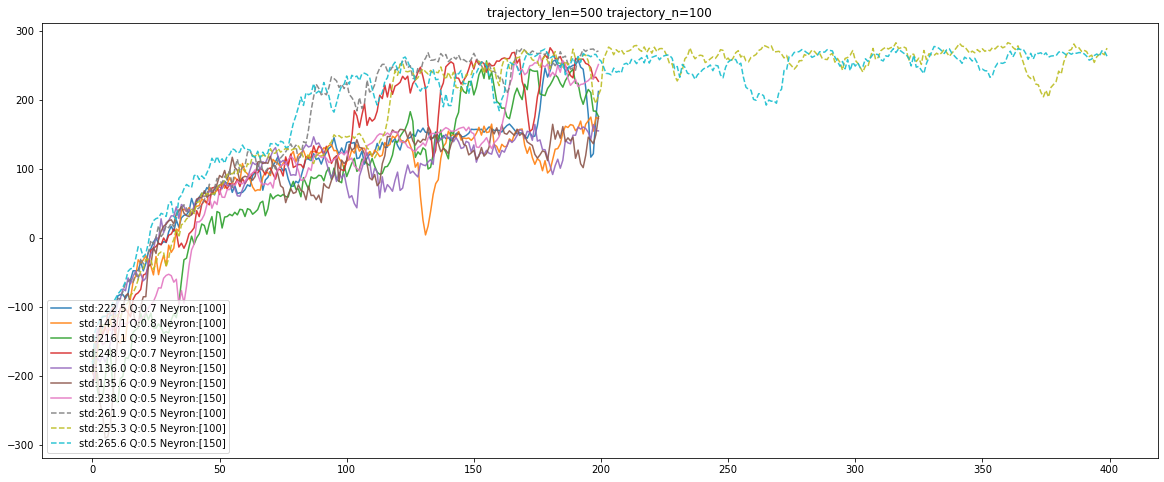

In [1049]:
lr_candidates = {'2289935299829',
'2289384530357',
'2287189634114',
'2287465267159',
'2287198420634',
'2287475451152',
'2287208017163',
'2287488265106','2291950921733',
'2292024736000'}

# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in data:
    if not (ed['id'] in lr_candidates): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = last_mean(ed['episode_data'], 25)
    lable = f"std:{std:0.4} Q:{ed['q_param']} Neyron:{ed['layers_n']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=100')
plt.show()

2291950921733
2292024736000


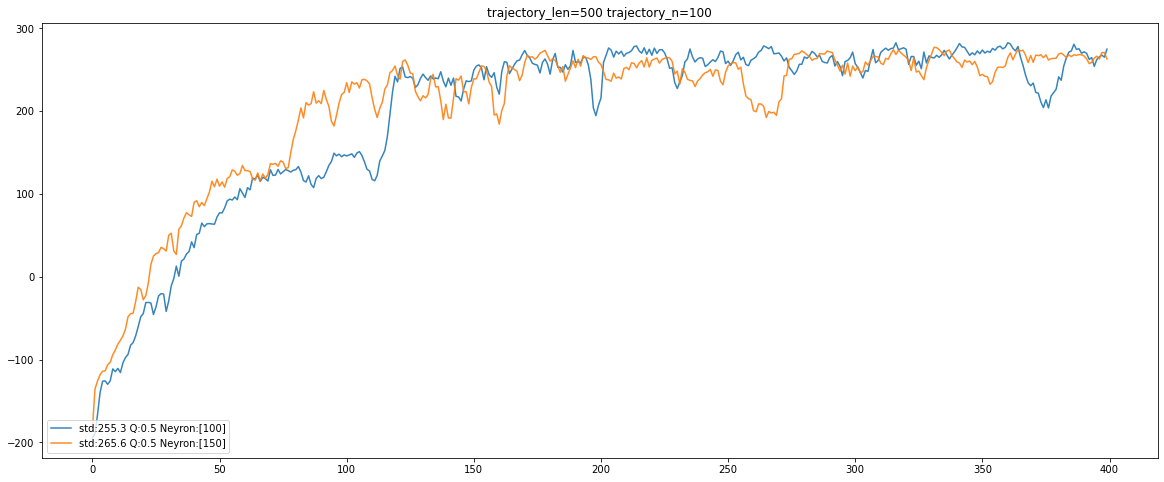

In [1050]:
lr_candidates = {'2291950921733',
'2292024736000'}

# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in data:
    if not (ed['id'] in lr_candidates): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    std = last_mean(ed['episode_data'], 25)
    lable = f"std:{std:0.4} Q:{ed['q_param']} Neyron:{ed['layers_n']}"
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=100')
plt.show()

2291757162014
2291817697935
2291879589435
2291950921733
2292024736000
2292098547091


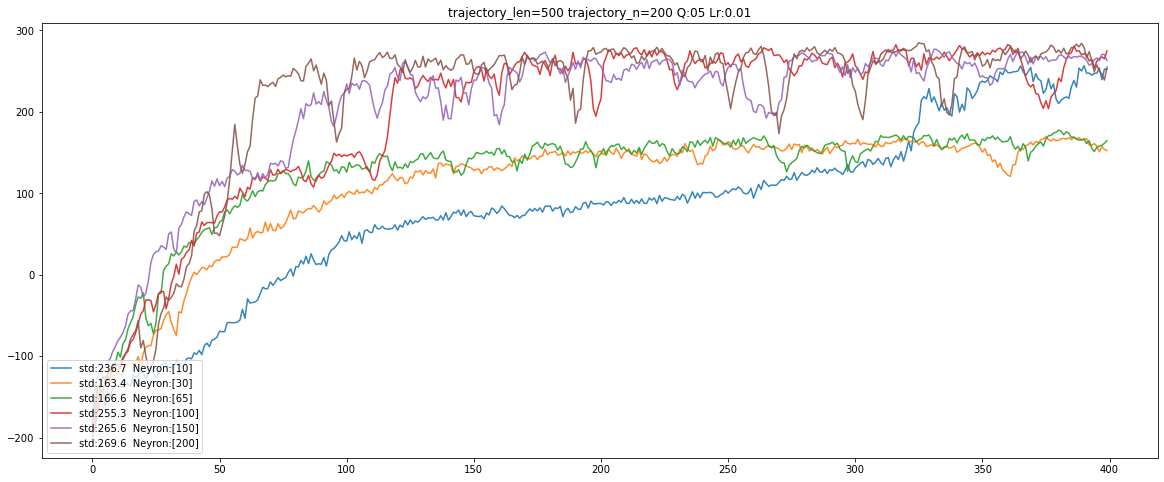

In [1051]:
lr_candidates = {
    
'2291757162014',
'2291817697935',
'2291879589435',
'2291950921733',
'2292024736000',
'2292098547091'}

# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in data:
    if not (ed['id'] in lr_candidates): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    std = last_mean(ed['episode_data'], 25)
    lable = f"std:{std:0.4}  Neyron:{ed['layers_n']}"
    print(ed['id'])
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=200 Q:05 Lr:0.01')
plt.show()

2290410650317 std:198.9  Neyron:[200]
2289384530357 std:261.9  Neyron:[100]
6417427043 std:231.0  Neyron:[200]
2289569819764 std:263.6  Neyron:[100]


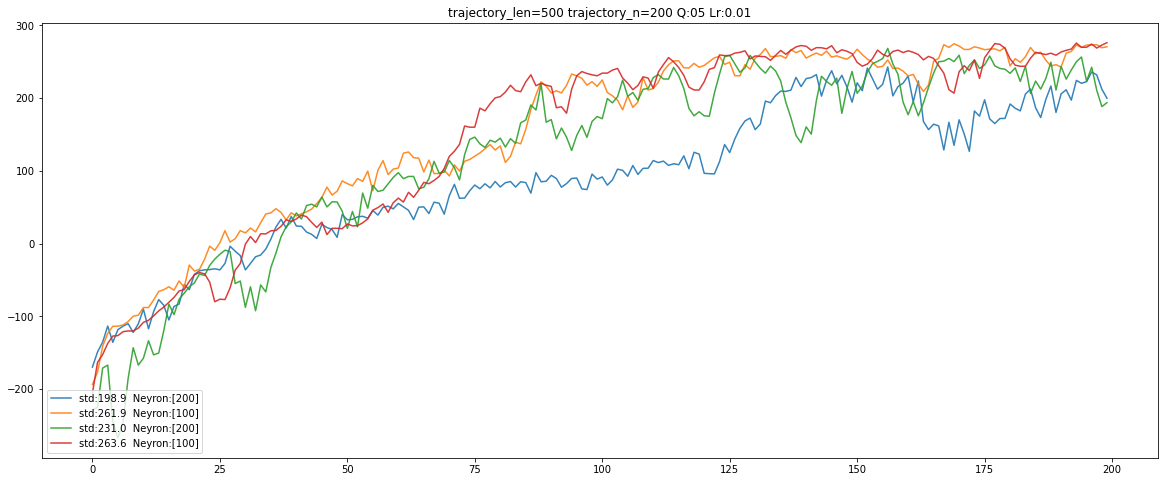

In [1064]:
lr_candidates = {
    
'2290410650317',
'6417427043',
'2289384530357',
'2289569819764'
}

# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in data:
    if not (ed['id'] in lr_candidates): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    std = last_mean(ed['episode_data'], 25)
    lable = f"std:{std:0.4}  Neyron:{ed['layers_n']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=200 Q:05 Lr:0.01')
plt.show()

2295544359654 mean:177.1  Neyron:[65, 30]
2295195100690 mean:155.9  Neyron:[10, 10]
2295516527882 mean:145.7  Neyron:[65, 10]
2295221248791 mean:143.2  Neyron:[10, 30]
2295244280154 mean:93.75  Neyron:[10, 65]
2295405400446 mean:91.79  Neyron:[30, 65]
2295570656342 mean:-89.97  Neyron:[65, 65]


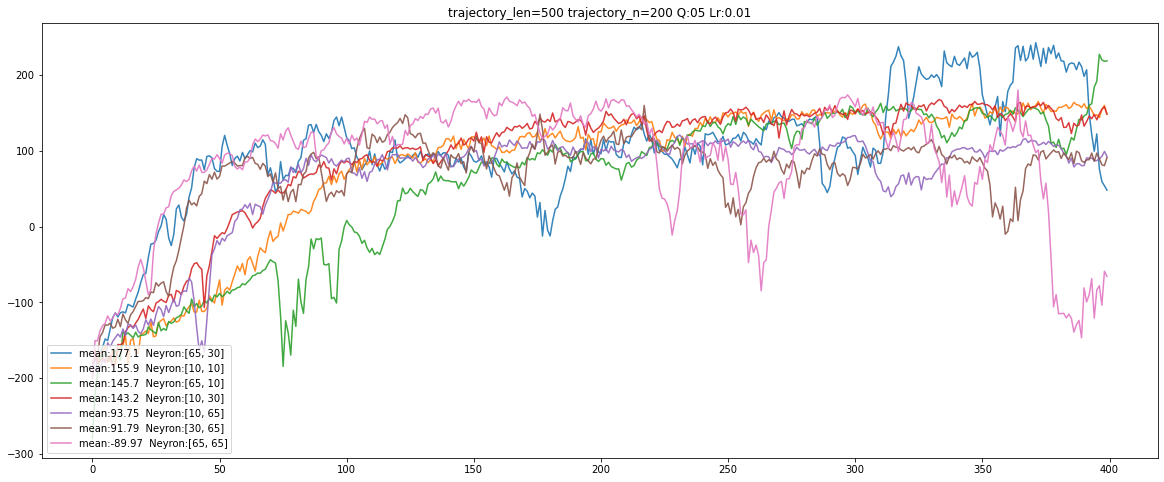

In [1077]:
lr_candidates = {
'2295244280154',
'2295195100690',
'2295221248791',
'2295405400446',
'2295516527882',
'2295544359654',
'2295570656342'
}

# for group in sorted(groups):
graph_data = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'],25)):
    if not (ed['id'] in lr_candidates): continue
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    graph_data.append(ed)
    
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    std = last_mean(ed['episode_data'], 25)
    lable = f"mean:{std:0.4}  Neyron:{ed['layers_n']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
#     leg = plt.legend(loc='lower right')
    leg = plt.legend(loc='lower left')
plt.title('trajectory_len=500 trajectory_n=200 Q:05 Lr:0.01')
plt.show()

In [264]:
from plotly.graph_objs.layout.scene import ZAxis, XAxis, YAxis
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML


In [262]:
import sklearn.preprocessing as pre 

In [152]:
ss = pre.StandardScaler()

In [267]:
def norms(a):
    mi = np.min(a)
    return (a-mi)/(np.max(a-mi))

In [268]:
# for group in sorted(groups):
graph_data = []
graph_data_text = []
# for ed in  sorted(data, key=lambda x:x['layers_n']):
# for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0][-20:])):
for ed in sorted(data, key=lambda x:-np.std(np.array(x['episode_data'])[::,0][-50:])):
    if (len(ed['layers_n'])!=3): continue
    
#     if (ed['trajectory_len']!= 1000
#         or ed['trajectory_n']<11
#         or  ed['q_param'] != 0.7
#         ): continue
    mean_reward = np.mean(np.array(ed['episode_data'])[::,0][-50:])
    graph_data.append(ed['layers_n']+[mean_reward])
    graph_data_text.append(f"Q:{ed['q_param']}: Mr:{mean_reward:0.4}")
    
graph_data
graph_data = np.array(graph_data)


In [269]:

graph_data = np.array(graph_data)


# LAB
points1 = go.Scatter3d(
    x=graph_data[::,0],
    y=graph_data[::,1],
    z=graph_data[::,2],
    text=graph_data_text,
    mode='markers',
    marker=dict(
        sizemode='diameter',
#         sizeref=750,
        size=norms(graph_data[::,3])*40,
        opacity =  0.5,
        color = ['green' if mr>0 else 'red' for mr in  graph_data[::,3]]
#         colorscale = 'Viridis',
#         colorbar_title = 'Life<br>Expectancy',
    )
)


fig = go.Figure(data=[ points1])


fig.layout.update(height=1000, width=1000,overwrite=True,
#                   scene=scene(
#                           xaxis=XAxis(title='Blue'),
#                         yaxis=YAxis(title='Green'),
#                         zaxis=ZAxis(title='Red')
#                     ),
                  
                  title='Examining Population and Life Expectancy Over Time')

fig.show()

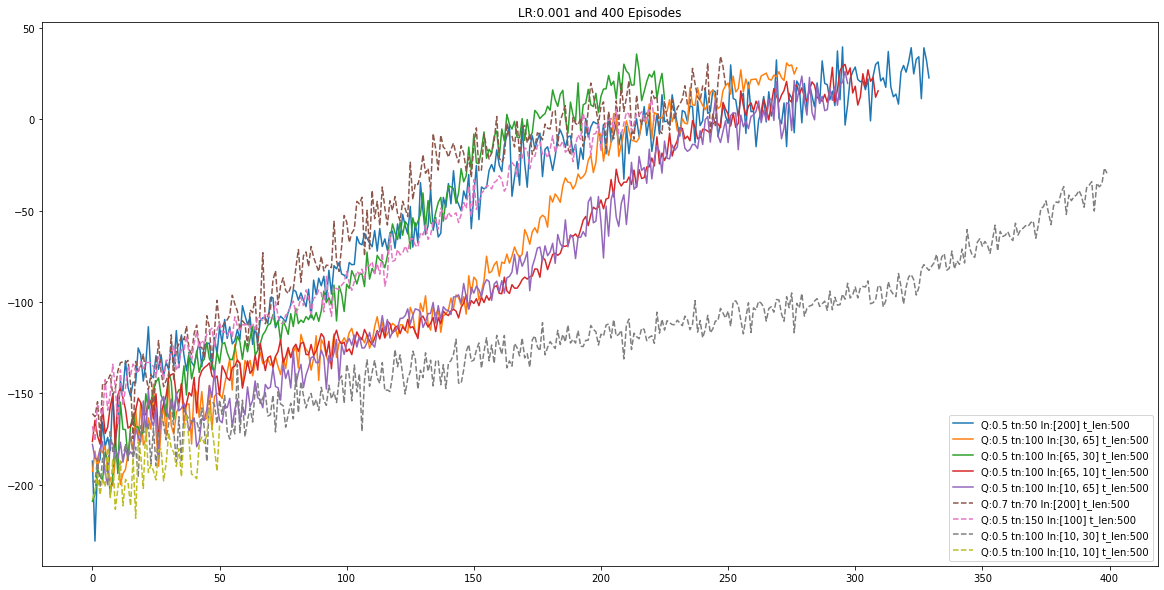

In [1090]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-last_mean(x['episode_data'],25)):
    if (not (ed['version'] in{'5','6'})):continue
#         or ed['type'] != 'Cem'
#         or len(ed['episode_data']) < 90 
#        ): continue
    graph_data.append(ed)

plt.figure(figsize=(20,10))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"Quant:{ed['q_param']}"
    lable = f"Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"

    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 4 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('LR:0.001 and 400 Episodes')
    #     break
plt.show()